In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [19]:
release_year = df[['show_id', 'release_year']].groupby('release_year').count()

release_year

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


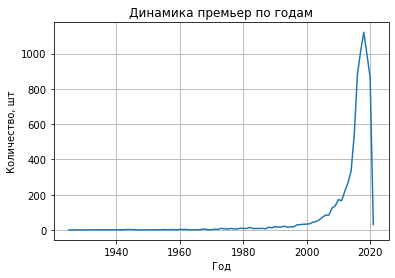

In [36]:
plt.plot(release_year.index, release_year['show_id'])
plt.title('Динамика премьер по годам')
plt.xlabel('Год')
plt.ylabel('Количество, шт')
plt.grid(True)


In [ ]:
#по данному графику можно сделать вывод, что количество фильмов и шоу,доступных на Netflix, резко возросло 
#после 2010 года 

In [39]:
type_ = df[['show_id','type']].groupby('type').count()

type_

,show_id
type,
Movie,5377
TV Show,2410


<AxesSubplot:title={'center':'Количество фильмов и телепередач'}, xlabel='Вид программы', ylabel='Количество'>

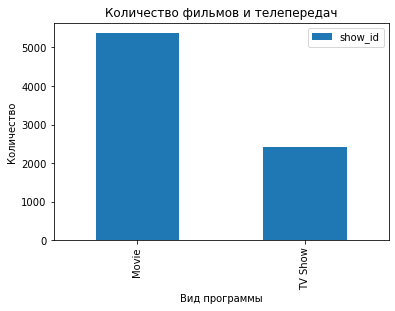

In [40]:
type_.plot(kind='bar', 
           title='Количество фильмов и шоу',
           xlabel='Вид программы',
           ylabel='Количество')

In [ ]:
#по данной диаграмме можно сделать вывод, что количество фильмов практически вдвоем превыщает количество шоу,
#доступных на Netflix

In [43]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [51]:
top_ratings = df[['rating','show_id']].groupby('rating').count().sort_values('show_id',ascending=False).head(3)

top_ratings

,show_id
rating,
TV-MA,2863
TV-14,1931
TV-PG,806


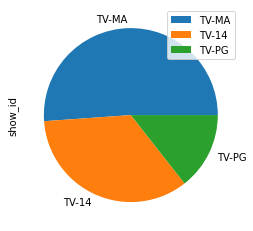

In [54]:
top_ratings.plot(kind='pie',subplots=True)

plt.legend()


In [ ]:
#топ 3 телевизионных рейтинга фильмов/шоу

In [103]:
ratings = df[['rating','show_id']].groupby('rating').count()

ratings

,show_id
rating,
G,39
NC-17,3
NR,84
PG,247
PG-13,386
R,665
TV-14,1931
TV-G,194
TV-MA,2863


<AxesSubplot:title={'center':'Распределение рейтингов фильмов/шоу'}>

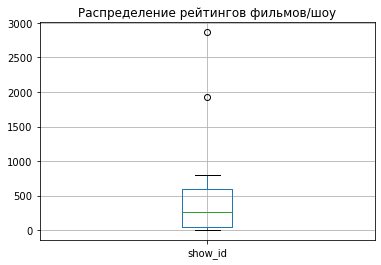

In [114]:
ratings['show_id'].plot(kind='box',
                   title='Распределение рейтингов фильмов/шоу', grid=True)

In [ ]:
#отсутсвуют выбросы в рейтингах